# 1. Load packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import anndata
import scanpy as sc
import os

import matplotlib.pyplot as plt

The link to get [ImageAnalysis3](https://github.com/zhengpuas47/ImageAnalysis3) 

or the Zhuang lab archived [source_tools](https://github.com/ZhuangLab/Chromatin_Analysis_2020_cell/tree/master/sequential_tracing/source)

In [2]:
# Pu's ImageAnalysis3
%run "C:\Users\shiwei\Documents\ImageAnalysis3\required_files\Startup_py3.py"
sys.path.append(r"C:\Users\shiwei\Documents")

import ImageAnalysis3 as ia
%matplotlib inline

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast


51216


## 1.1 Define output folder

In [3]:
output_main_folder = r'L:\Shiwei\Figures\MOp_draft_2023_v2\Scheme_and_RNA_MERFISH'
output_analysis_folder = os.path.join(output_main_folder, 'analysis')
output_figure_folder = os.path.join(output_main_folder, 'figures')

make_output_folder = True

if make_output_folder and not os.path.exists(output_analysis_folder):
    os.makedirs(output_analysis_folder)
    print(f'Generating analysis folder: {output_analysis_folder}.')
elif os.path.exists(output_analysis_folder):
    print(f'Use existing analysis folder: {output_analysis_folder}.')
    
if make_output_folder and not os.path.exists(output_figure_folder):
    os.makedirs(output_figure_folder)
    print(f'Generating figure folder: {output_figure_folder}.')
elif os.path.exists(output_figure_folder):
    print(f'Use existing figure folder: {output_figure_folder}.')


Use existing analysis folder: L:\Shiwei\Figures\MOp_draft_2023_v2\Scheme_and_RNA_MERFISH\analysis.
Use existing figure folder: L:\Shiwei\Figures\MOp_draft_2023_v2\Scheme_and_RNA_MERFISH\figures.


## 1.2 setting up plotting parameters

In [4]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

import matplotlib
%matplotlib inline
matplotlib.rcParams['pdf.fonttype'] = 42

plt.rc('font', family='serif')
plt.rc('font', serif='Arial')


# Other required plotting parameters
_dpi = 300
_font_size = 7.5
_page_width = 5.5

sc.settings.n_jobs = 24
sc.settings.set_figure_params(dpi=_dpi/2, dpi_save=_dpi, frameon=False, 
                              figsize=(_page_width/2, _page_width/2), fontsize=_font_size, facecolor='white', transparent=True)
sc.settings.figdir = output_figure_folder

# 2. Plot figures

## 2.1 RNA-MERFISH gene copy average quality

### Load uncleared result

**new_labeled_data** can be generated by jupyter notebook from the relative path below:

[preprocess/1_rna_merfish/scripts/3_rna_merfish_celltype_rename](../../../preprocess/1_rna_merfish/scripts/3_rna_merfish_celltype_rename.ipynb)


In [4]:
target_adata_folder = r'L:\Shiwei\RNA_MERFISH_analysis\Merged_nonclear'
# load the processed adata that has UMAP and label information
merged_adata = sc.read(os.path.join(target_adata_folder,'new_labeled_data.h5ad'))

### Load cleared reference
Cleared MERFISH counts can be found here:

[counts_h5ad](../../../preprocess/1_rna_merfish/resources/merfish_mop_2021/counts.h5ad)

In [6]:
MOp_MERFISH_meng_preprocessed_for_integration_file =r'L:\Shiwei\RNA_MERFISH_analysis\Meng_data\counts.h5ad'
merfish_raw = sc.read_h5ad(MOp_MERFISH_meng_preprocessed_for_integration_file)

In [7]:
# Calculate quality control metrics
sc.pp.calculate_qc_metrics(merfish_raw, percent_top=None, log1p=False, inplace=True)

In [8]:
merfish_label = pd.read_csv(r'L:\Shiwei\RNA_MERFISH_analysis\Meng_data\cell_labels.csv', index_col=0)
merData = pd.DataFrame(merfish_raw.X, index = merfish_raw.obs.index, columns = merfish_raw.var.index)
labels = merfish_label.loc[merfish_label['label']!='-1']
# merge dataframes
merCluster=merData.merge(labels, how='inner', left_index=True, right_index=True)
count_ref = merCluster.iloc[:,:242]
count_ref

,1700022I11Rik,1810046K07Rik,5031425F14Rik,5730522E02Rik,Acta2,Adam2,Adamts2,Adamts4,Adra1b,Alk,...,Unc13c,Unc5b,Unc5d,Ust,Vipr2,Vtn,Vwc2,Wipf3,Wnt7b,Zfp804b
index,,,,,,,,,,,,,,,,,,,,,
10000143038275111136124942858811168393,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.659448,0.000000,...,0.659448,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.659448,6.594481,0.000000
100001798412490480358118871918100400402,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
100006878605830627922364612565348097824,0.0,0.000000,0.0,0.000000,25.567039,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,20.453632,0.000000,0.000000,0.000000,0.000000
100007228202835962319771548915451072492,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,8.372609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
100009332472089331948140672873134747603,0.0,0.491629,0.0,0.983257,0.491629,0.0,0.000000,0.000000,0.983257,0.000000,...,0.000000,0.000000,6.391172,0.000000,0.491629,0.491629,0.000000,17.698629,0.983257,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99987465505639073211021560543065098772,0.0,0.000000,0.0,0.557620,0.000000,0.0,0.000000,0.000000,0.557620,2.788098,...,0.557620,0.557620,1.672859,0.000000,0.000000,0.000000,2.230479,8.921914,0.000000,1.115239
99989592830367590092304100078674096866,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.829112,14.632893,0.000000,...,0.000000,0.000000,0.000000,3.658223,0.000000,0.000000,0.000000,5.487335,0.000000,0.000000
99991756591196613545069880666241120777,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.917610,0.000000


In [9]:
# count ref has not been normalized
count_ref.sum(axis=1)

index
10000143038275111136124942858811168393     110.787254
100001798412490480358118871918100400402     93.225395
100006878605830627922364612565348097824    148.288849
100007228202835962319771548915451072492    175.824799
100009332472089331948140672873134747603    381.503784
                                              ...    
99987465505639073211021560543065098772     302.229767
99989592830367590092304100078674096866     318.265442
99991756591196613545069880666241120777     159.104996
99997421766159526763299676887100858104     118.798698
99997470167777465101376150817407669505     387.621613
Length: 280186, dtype: float32

### Load bulk RNAseq

In [10]:
# bulk RNAseq downloaded by PZ 
## original source: 
## Y. Zhang et al., Purification and Characterization of Progenitor and Mature Human Astrocytes Reveals Transcriptional and Functional Differences with Mouse. Neuron 89, 37-53 (2016).
RNAseq_folder = r'\\mendel\Chromatin_RAID_0\MERFISH_Analysis\SequencingRef'
RNAseq = pd.read_csv(os.path.join(RNAseq_folder,'M1_bulk_all.csv'), index_col=0)

In [11]:
RNAseq

,fpkm1,fpkm2,fpkm3,average
4933401J01Rik,0.00000,0.00000,0.00000,0.000000
Gm26206,0.00000,0.00000,0.00000,0.000000
Xkr4,10.93150,9.00301,9.98574,9.973417
Gm18956,0.00000,0.00000,0.00000,0.000000
Gm37180,1.39509,1.26418,1.28212,1.313797
...,...,...,...,...
CAAA01205117.1,0.00000,0.00000,0.00000,0.000000
CAAA01098150.1,0.00000,0.00000,0.00000,0.000000
CAAA01064564.1,0.00000,0.00000,0.00000,0.000000
Vmn2r122,0.00000,0.00000,0.00000,0.000000


### Correlation between cleared and uncleared

In [13]:
# check to determine if the total counts from qc has not been normalized
merged_adata.obs['total_counts']

Unnamed: 0
103489270985795086009915676188840872439    104.0
113811790893231448949429397438012891173    103.0
119547840309256440899855144626134392385     37.0
120849314423504941338008541020153695260    186.0
125550627244524118102850004242680097855     47.0
                                           ...  
216743509822996359971425086529065233172     30.0
235791795914903367868231154493525204064     22.0
281137009595534032327996677664017059078     23.0
53631180073186654291241335400076244597      26.0
91438720578084772766153254208668721365      24.0
Name: total_counts, Length: 62732, dtype: float32

meta NOT subset; don't know how to subset; dropped


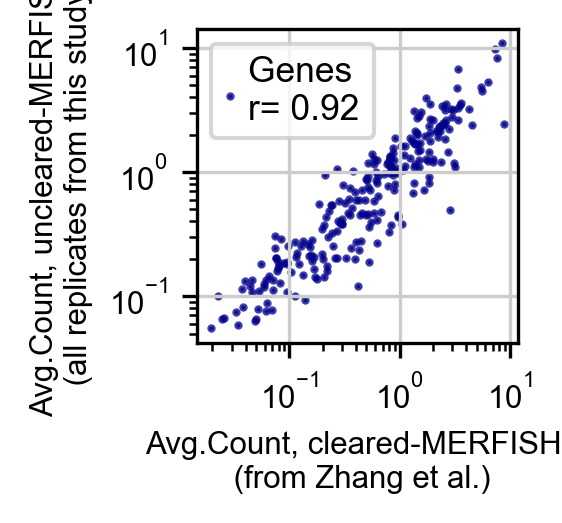

In [70]:
mean_ref = np.mean(count_ref, axis=0)
mean_query = merged_adata.var['mean_counts']

# Regression and get correlation
from scipy import stats
from scipy.stats import linregress


xs = mean_ref
ys = mean_query

fig, ax = plt.subplots(figsize=(_page_width/4,_page_width/4),dpi=_dpi/2)


slope, intercept, r_value, p_value, std_err = linregress(np.log10(xs), np.log10(ys))
xfid = np.linspace(0.05,3)

gfg = ax.scatter(xs,ys, s=1, 
                 label=f'Genes \n' + 'r' + f'= {round(r_value,2)}',
                 c='darkblue',
                 facecolors='darkblue', edgecolors='darkblue',
                 #fontsize =7,
                 rasterized=True,
                 alpha=0.75)


plt.xlabel('Avg.Count, cleared-MERFISH \n (from Zhang et al.)',fontsize=_font_size)
plt.ylabel('Avg.Count, uncleared-MERFISH \n (all replicates from this study)',fontsize=_font_size)
plt.tick_params(axis='x', labelsize=_font_size)
plt.tick_params(axis='y', labelsize=_font_size)

ax.legend()
# for legend text
plt.setp(ax.get_legend().get_texts(), fontsize=f'{_font_size+1}') 
ax.set_yscale('log',base=10)
ax.set_xscale('log',base=10)

ax.grid(True)

plt.savefig(os.path.join(output_figure_folder, f'MOp_correlation_with_cleared_MERFISH.pdf'), 
            transparent=True, dpi=_dpi, bbox_inches='tight')

### Correlation between bulk RNAseq and uncleared

In [32]:
shared_genes = np.intersect1d(merged_adata.var.index, RNAseq.index)

mean_ref = RNAseq.loc[shared_genes]['average']
mean_query = merged_adata.var.loc[shared_genes]['mean_counts']

In [34]:
# number of genes that have zero count from bulk RNAseq
np.sum(mean_ref==0)
#mean_ref!=0

7

meta NOT subset; don't know how to subset; dropped


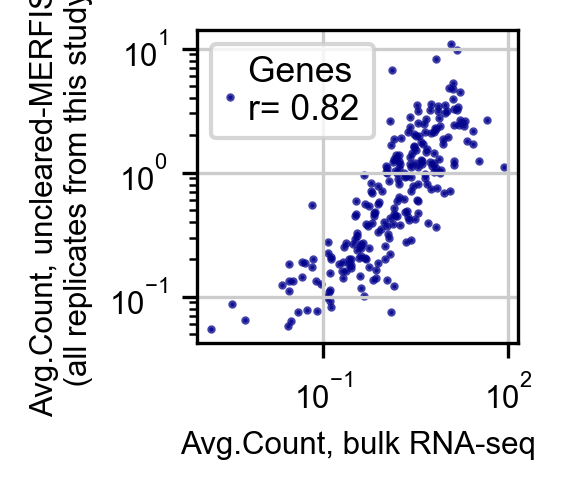

In [72]:
shared_genes = np.intersect1d(merged_adata.var.index, RNAseq.index)

mean_ref = RNAseq.loc[shared_genes]['average']
mean_query = merged_adata.var.loc[shared_genes]['mean_counts']

# Regression and get correlation
from scipy import stats
from scipy.stats import linregress

# remove genes that have zero count from bulk RNAseq
good_idx = mean_ref!=0
xs = mean_ref[good_idx]
ys = mean_query[good_idx]


fig, ax = plt.subplots(figsize=(_page_width/4,_page_width/4),dpi=_dpi/2)


slope, intercept, r_value, p_value, std_err = linregress(np.log10(xs), np.log10(ys))
xfid = np.linspace(0.05,3)


gfg = ax.scatter(xs,ys, s=1, 
                 label=f'Genes \n' + 'r' + f'= {round(r_value,2)}',
                 c='darkblue',
                 facecolors='darkblue', edgecolors='darkblue',
                 #fontsize =7,
                 rasterized=True,
                 alpha=0.75)

plt.xlabel('Avg.Count, bulk RNA-seq',fontsize=_font_size)
plt.ylabel('Avg.Count, uncleared-MERFISH \n (all replicates from this study)',fontsize=_font_size)
plt.tick_params(axis='x', labelsize=_font_size)
plt.tick_params(axis='y', labelsize=_font_size)


ax.legend()
# for legend text
plt.setp(ax.get_legend().get_texts(), fontsize=f'{_font_size+1}') 

ax.set_yscale('log',base=10)
ax.set_xscale('log',base=10)

ax.grid(True)

plt.savefig(os.path.join(output_figure_folder, f'MOp_correlation_with_bulk_RNAseq_zero_removed.pdf'), 
            transparent=True, dpi=_dpi, bbox_inches='tight')

### Correlation between replicate

In [73]:
np.unique(merged_adata.obs['experiment'].tolist())

array(['20220304', '20220329', '20220415', '20220418'], dtype='<U8')

In [74]:
# use original counts (which has been normalized to the total)
adata = merged_adata.raw.to_adata()
adata.X.shape
adata.X.sum(axis=1)

array([200.     , 200.     , 200.00002, ..., 200.     , 200.     ,
       200.00002], dtype=float32)

meta NOT subset; don't know how to subset; dropped


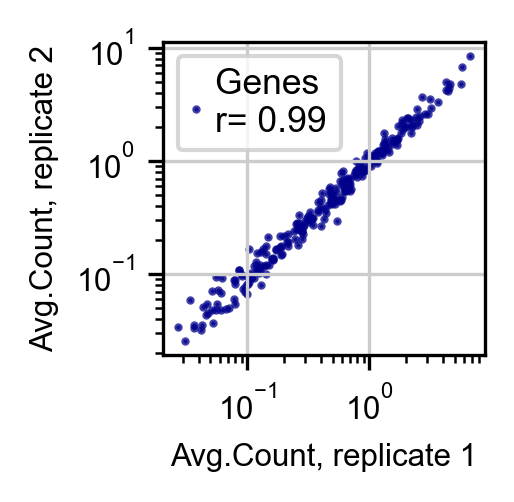

In [78]:
%matplotlib inline

exp_list = np.unique(merged_adata.obs['experiment'].tolist())

#from itertools import combinations
from scipy import stats
from scipy.stats import linregress

# use original counts (only normalized to the total)
adata = merged_adata.raw.to_adata()

# select two replicates
sel_exp_1 = '20220415'
sel_exp_2 = '20220418'
x_adata = adata[adata.obs['experiment']==sel_exp_1]
y_adata = adata[adata.obs['experiment']==sel_exp_2]
# quick re-calculate the mean
xs_raw = np.nanmean(x_adata.X, axis=0)
ys_raw = np.nanmean(y_adata.X, axis=0)
xs_ind =xs_raw>0
ys_ind =ys_raw>0
xs = xs_raw[xs_ind*ys_ind]
ys = ys_raw[xs_ind*ys_ind]

fig, ax = plt.subplots(figsize=(_page_width/4,_page_width/4),dpi=_dpi/2,)


slope, intercept, r_value, p_value, std_err = linregress(np.log10(xs), np.log10(ys))
xfid = np.linspace(0.05,3)


gfg = ax.scatter(xs,ys, s=1, 
                 label=f'Genes \n' + 'r' + f'= {round(r_value,2)}',
                 c='darkblue',
                 facecolors='darkblue', edgecolors='darkblue',
                 #fontsize =7,
                 rasterized=True,
                 alpha=0.75)


plt.xlabel('Avg.Count, replicate 1',fontsize=_font_size)
plt.ylabel('Avg.Count, replicate 2',fontsize=_font_size)
plt.tick_params(axis='x', labelsize=_font_size)
plt.tick_params(axis='y', labelsize=_font_size)


ax.legend()
# for legend text
plt.setp(ax.get_legend().get_texts(), fontsize=f'{_font_size+1}') 


ax.set_yscale('log',base=10)
ax.set_xscale('log',base=10)


ax.grid(True)

plt.savefig(os.path.join(output_figure_folder, f'MOp_correlation_between_norm_replicates.pdf'), 
            transparent=True, dpi=_dpi, bbox_inches='tight')

## 2.2 RNA-MERFISH analyses

### The h5ad result can be generated by scripts from the relative path below:


In [79]:
target_adata_folder = r'L:\Shiwei\RNA_MERFISH_analysis\Merged_nonclear'
# load the processed adata that has UMAP and label information
merged_adata = sc.read(os.path.join(target_adata_folder,'new_labeled_data.h5ad'))

In [80]:
merged_adata

AnnData object with n_obs × n_vars = 62732 × 242
    obs: 'fov', 'volume', 'center_x', 'center_y', 'min_x', 'max_x', 'min_y', 'max_y', 'experiment', 'n_genes_by_counts', 'total_counts', 'doublet_score', 'predicted_doublet', 'leiden', 'leiden_subclass', 'subclass_prediction_label', 'leiden_subclass_sub', 'subclass_manual_label', 'subclass_manual_label_predict', 'subclass_label_new', 'class_label_new', 'neuron_identity'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'dendrogram_subclass_label_new', 'experiment_colors', 'leiden', 'leiden_colors', 'leiden_subclass_colors', 'leiden_subclass_sub_colors', 'neighbors', 'pca', 'scrublet', 'subclass_label_new_colors', 'subclass_manual_label_colors', 'subclass_prediction_label_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [81]:
celltype_palette = {'Astro':'lightcoral', 
                    'Endo':'skyblue', 
                    'L2/3 IT':'gold', 
                    'L4/5 IT':'darkorange', 
                    'L5 ET':'mediumseagreen', 
                    'L5 IT':'aqua',
                    'L5/6 NP':'darkgreen',
                    'L6 CT':'brown',
                    'L6 IT':'magenta',
                    'L6b':'blue', 
                    'Lamp5':'orange', 
                    'Micro':'peachpuff',
                    'OPC':'thistle', 
                    'Oligo':'darkviolet',
                    'Peri':'sandybrown',
                    'Pvalb':'springgreen',
                    'SMC':'rosybrown',
                    'Sncg':'darkkhaki',
                    'Sst':'steelblue', 
                    'VLMC':'saddlebrown', 
                    'Vip':'red',
                    'other':'slategray'}

### UMAP

In [82]:
print(len(np.unique(merged_adata.obs['subclass_label_new'])))
np.unique(merged_adata.obs['subclass_label_new'])

22


array(['Astro', 'Endo', 'L2/3 IT', 'L4/5 IT', 'L5 ET', 'L5 IT', 'L5/6 NP',
       'L6 CT', 'L6 IT', 'L6b', 'Lamp5', 'Micro', 'OPC', 'Oligo', 'Peri',
       'Pvalb', 'SMC', 'Sncg', 'Sst', 'VLMC', 'Vip', 'other'],
      dtype=object)

C:\Users\shiwei\Anaconda3\envs\shiwei_chromatin\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
meta NOT subset; don't know how to subset; dropped


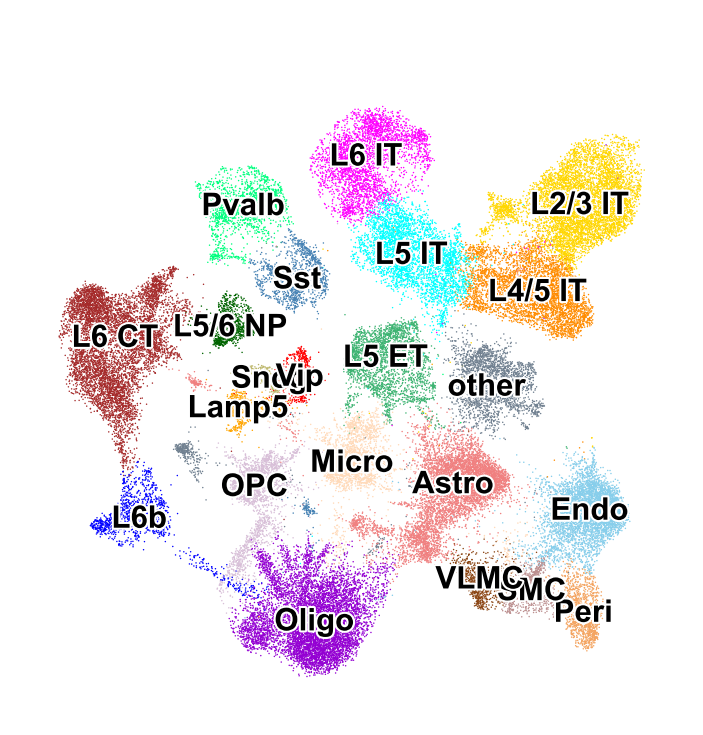

In [97]:
# Plot UMAP to check; modify the plotting appearance later
sc.settings.set_figure_params(dpi=_dpi/2, dpi_save=_dpi, frameon=False, 
                              figsize=(_page_width/2, _page_width/2), fontsize=_font_size, facecolor='white',)


#check for other palette options: https://matplotlib.org/stable/tutorials/colors/colormaps.html

umap_ax = sc.pl.umap(merged_adata, color='subclass_label_new', 
           title = ' ', 
           size=_font_size,
           #palette = 'terrain',
           s=0.5,
           palette = celltype_palette,
           legend_fontoutline = True,
           legend_loc='on data',
           #save=True,
           save=f'_MOp_celltype_UMAP.pdf',
          )



### Spatial distribution

In [98]:
np.unique(merged_adata.obs['experiment'])

array(['20220304', '20220329', '20220415', '20220418'], dtype=object)

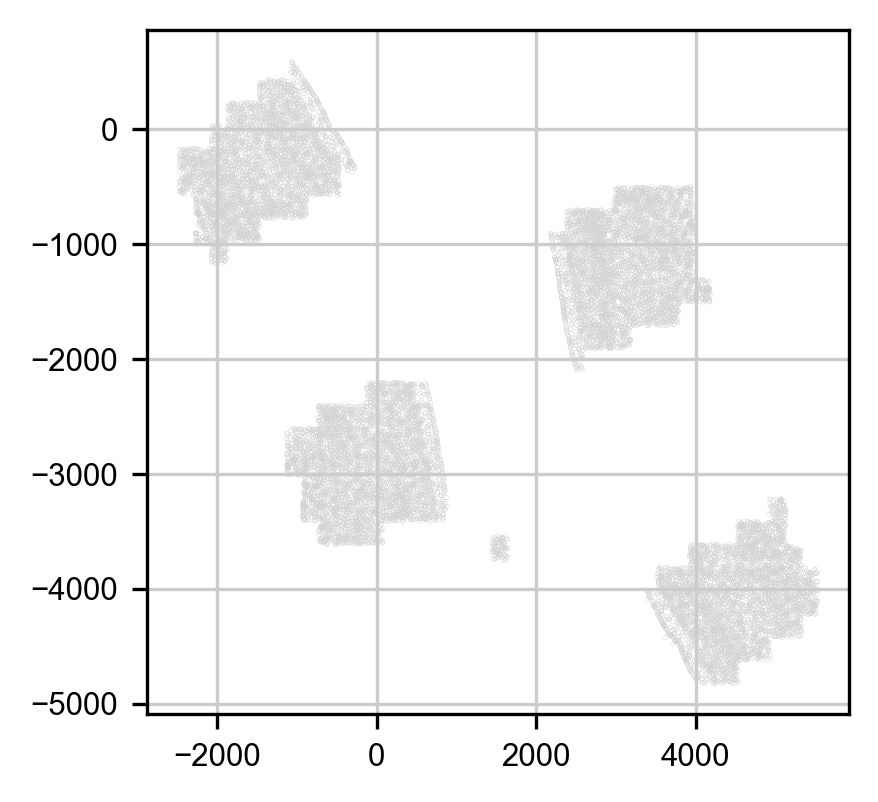

In [99]:
sel_exp_name = '20220415'
sel_exp_adata = merged_adata[merged_adata.obs['experiment']==sel_exp_name]
fig, ax = plt.subplots(figsize=(3,3))
ax.scatter(sel_exp_adata.obs['center_x'], sel_exp_adata.obs['center_y'], c='lightgrey', s=0.01)

meta NOT subset; don't know how to subset; dropped


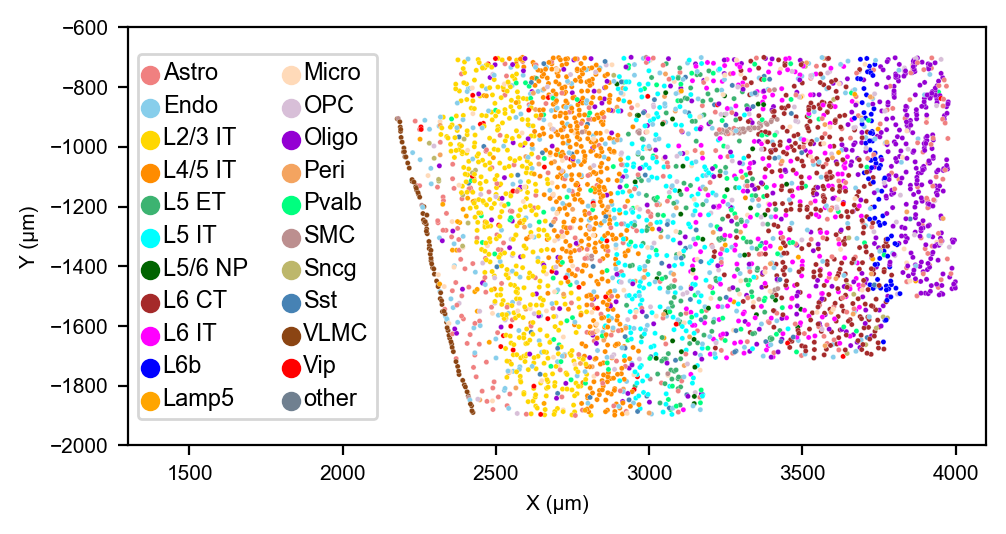

In [106]:
adata_small = sel_exp_adata.obs[(sel_exp_adata.obs['center_x']>2000) & (sel_exp_adata.obs['center_x']<4000)]
adata_small = adata_small[(adata_small['center_y']>-1900) & (adata_small['center_y']<-700)]

x1, x2 = 1300, 4100
y1, y2 = -2000, -600

fig, ax = plt.subplots(figsize=(_page_width/2*((x2-x1)/(y2-y1)),_page_width/2),dpi=100)

gfg = sns.scatterplot(data=adata_small, 
                x='center_x', 
                y='center_y', 
                hue='subclass_label_new', 
                ax =ax,
                palette = celltype_palette, 
                s=3.5, linewidth=.1, 
                rasterized=True,
                     )

ax.legend().set_title('')
sns.move_legend(ax, "center left", #bbox_to_anchor=(0.5, 1.15), 
                ncol=2)
# for legend text
plt.setp(gfg.get_legend().get_texts(), fontsize=f'{_font_size+1}') 
 
# for legend title
plt.setp(gfg.get_legend().get_title(), fontsize='0') 


plt.tick_params(axis='x', labelsize=_font_size)
plt.tick_params(axis='y', labelsize=_font_size) 

#plt.axis('equal')
#plt.legend(loc='best')
ax.set_xlim([x1,x2])
ax.set_ylim([y1,y2])
plt.xlabel('X (\u03bcm)', fontsize=_font_size)
plt.ylabel('Y (\u03bcm)', fontsize=_font_size)
ax.grid(False)

plt.savefig(os.path.join(output_figure_folder, f'MOp_celltype_spatial_exp{sel_exp_name}.pdf'), 
            transparent=True, dpi=_dpi, bbox_inches='tight')

### Celltype stats (not used because some cells were not recovered by DNA-MERFISH)

In [107]:
types, counts = np.unique(merged_adata.obs['subclass_manual_label'], return_counts=True)

In [108]:
counts

counts[np.where(types=='Astro')][0]

6473

In [109]:
# sort celltype by order
sorted_celltype_labels = ['L2/3 IT','L4/5 IT','L5 IT','L6 IT','L5 ET','L5/6 NP','L6 CT','L6b',
                           'Sst','Pvalb','Lamp5','Sncg','Vip',
                           'Astro','Oligo','OPC','Micro','Endo','VLMC','SMC','Peri', 
                           #'other',
                          ]


sorted_types = []
sorted_counts = []
bar_color_list = []
for _type in sorted_celltype_labels:
    if _type in types:
        sorted_types.append(_type)
        sorted_counts.append(counts[np.where(types==_type)][0])
        bar_color_list.append(celltype_palette[_type])
    else:
        continue
    

C:\Users\shiwei\AppData\Local\Temp\2\ipykernel_29036\1917915187.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sorted_types, rotation=90, fontsize=_font_size)
C:\Users\shiwei\AppData\Local\Temp\2\ipykernel_29036\1917915187.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
meta NOT subset; don't know how to subset; dropped


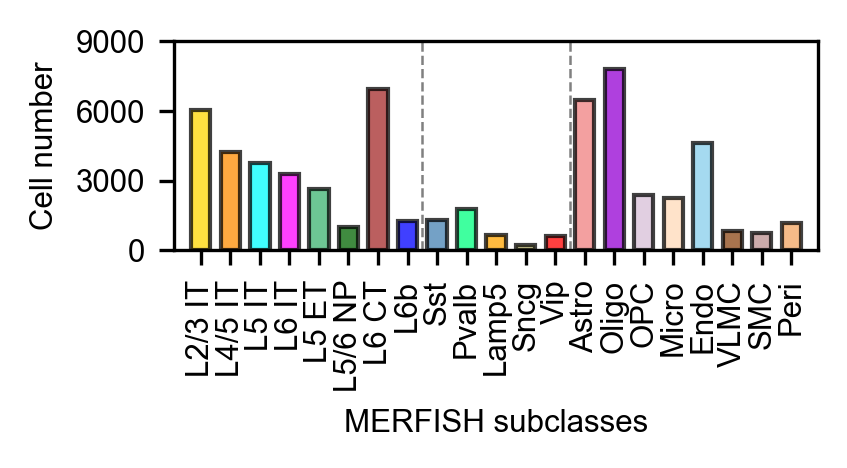

In [122]:
# print class number
#plt.style.use('default')

edge_width = 0.9

fig, ax = plt.subplots(figsize=(_page_width/2,(_page_width/2)/3), dpi=_dpi/2)

ax.bar(sorted_types, sorted_counts, 
       edgecolor = 'black', 
       linewidth = 1,
       alpha = 0.75,
       color = bar_color_list, width=0.65)


ax.set_xticklabels(sorted_types, rotation=90, fontsize=_font_size)
#ax.set_yticklabels(types, rotation=45, fontsize=12)
ax.grid(False)

ax.set_ylim([0, 9000])
ax.set_xlim([-edge_width, len(sorted_types)-1+edge_width])

plt.tick_params(axis='x', labelsize=_font_size)
plt.tick_params(axis='y', labelsize=_font_size)   
#plt.xticks(rotation = 75)
plt.yticks([0,3000,6000,9000])
#plt.xlabel(ref_cluster_column, size=12) 
#plt.ylabel(check_query_cluster_column, size=12)

plt.xlabel('MERFISH subclasses', size=_font_size) 
plt.ylabel('Cell number', size=_font_size)

ex_cells = ['L2/3 IT','L4/5 IT','L5 IT','L6 IT','L5 ET','L5/6 NP','L6 CT','L6b',]
in_cells = ['Sst','Pvalb','Lamp5','Sncg','Vip',]
ax.axvline(x=len(ex_cells)-.5, linestyle='dashed', color='gray', linewidth=0.6, alpha=1)
ax.axvline(x=len(ex_cells)+len(in_cells)-.5, linestyle='dashed',color='gray',linewidth=0.6, alpha=1)

fig.show()

plt.savefig(os.path.join(output_figure_folder, f'MOp_celltype_number.pdf'), 
            transparent=True, dpi=_dpi, bbox_inches='tight')

### Celltype stats after DNA-MERFISH

#### Load cell number from CellInfoList

**subclass_2_cellInfo** after DNA preprocessing can be generated by jupyter notebook below:

[preprocess/2_dna_merfish/scripts/2_spot_pick/4_summarize_jie_to_dict.ipynb](../../../preprocess/2_dna_merfish/scripts/2_spot_pick/4_summarize_jie_to_dict.ipynb)

In [124]:
postanalysis_folder = r'\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis_20230201\MOp_WT_postanalysis\postanalysis_vCW2_sorted'

# subclass info
import pickle
subclass_2_cellInfoList_filename = os.path.join(postanalysis_folder, 'subclass_2_cellInfo.pkl')
subclass_2_cellInfoList = pickle.load(open(subclass_2_cellInfoList_filename, 'rb'))

In [125]:
celltype_palette = {'Astro':'lightcoral', 
                    'Endo':'skyblue', 
                    'L2/3 IT':'gold', 
                    'L4/5 IT':'darkorange', 
                    'L5 ET':'mediumseagreen', 
                    'L5 IT':'aqua',
                    'L5/6 NP':'darkgreen',
                    'L6 CT':'brown',
                    'L6 IT':'magenta',
                    'L6b':'blue', 
                    'Lamp5':'orange', 
                    'Micro':'peachpuff',
                    'OPC':'thistle', 
                    'Oligo':'darkviolet',
                    'Peri':'sandybrown',
                    'Pvalb':'springgreen',
                    'SMC':'rosybrown',
                    'Sncg':'darkkhaki',
                    'Sst':'steelblue', 
                    'VLMC':'saddlebrown', 
                    'Vip':'red',
                    'other':'slategray'}

In [129]:
#subclass_2_cellInfoList
# sort celltype by order
sorted_celltype_labels = ['L2/3 IT','L4/5 IT','L5 IT','L6 IT','L5 ET','L5/6 NP','L6 CT','L6b',
                           'Sst','Pvalb','Lamp5','Sncg','Vip',
                           'Astro','Oligo','OPC','Micro','Endo','VLMC','SMC','Peri', 
                           #'other',
                          ]


sorted_types = []
sorted_counts = []
bar_color_list = []
for _type in sorted_celltype_labels:
    if _type in subclass_2_cellInfoList.keys():
        sorted_types.append(_type)
        sorted_counts.append(len(subclass_2_cellInfoList[_type]))
        bar_color_list.append(celltype_palette[_type])
    else:
        continue

In [132]:
np.sum(sorted_counts)

46340

C:\Users\shiwei\AppData\Local\Temp\2\ipykernel_29036\2360754458.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sorted_types, rotation=90, fontsize=_font_size)
C:\Users\shiwei\AppData\Local\Temp\2\ipykernel_29036\2360754458.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
meta NOT subset; don't know how to subset; dropped


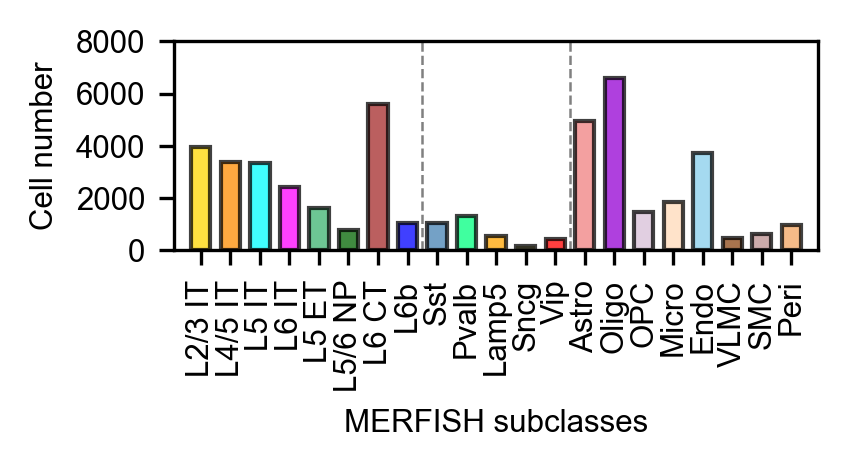

In [134]:
# print class number
#plt.style.use('default')

edge_width = 0.9

fig, ax = plt.subplots(figsize=(_page_width/2,(_page_width/2)/3), dpi=_dpi/2)

ax.bar(sorted_types, sorted_counts, 
       edgecolor = 'black', 
       linewidth = 1,
       alpha = 0.75,
       color = bar_color_list, width=0.65)


ax.set_xticklabels(sorted_types, rotation=90, fontsize=_font_size)
#ax.set_yticklabels(types, rotation=45, fontsize=12)
ax.grid(False)

ax.set_ylim([0, 8000])
ax.set_xlim([-edge_width, len(sorted_types)-1+edge_width])

plt.tick_params(axis='x', labelsize=_font_size)
plt.tick_params(axis='y', labelsize=_font_size)   
#plt.xticks(rotation = 75)
plt.yticks([0,2000,4000,6000,8000])
#plt.xlabel(ref_cluster_column, size=12) 
#plt.ylabel(check_query_cluster_column, size=12)

plt.xlabel('MERFISH subclasses', size=_font_size) 
plt.ylabel('Cell number', size=_font_size)

ex_cells = ['L2/3 IT','L4/5 IT','L5 IT','L6 IT','L5 ET','L5/6 NP','L6 CT','L6b',]
in_cells = ['Sst','Pvalb','Lamp5','Sncg','Vip',]
ax.axvline(x=len(ex_cells)-.5, linestyle='dashed', color='gray', linewidth=0.6, alpha=1)
ax.axvline(x=len(ex_cells)+len(in_cells)-.5, linestyle='dashed',color='gray',linewidth=0.6, alpha=1)

fig.show()

plt.savefig(os.path.join(output_figure_folder, f'MOp_celltype_number_forDNA.pdf'), 
            transparent=True, dpi=_dpi, bbox_inches='tight')

#### Celltype composition

In [135]:
sorted_celltype_labels = ['L2/3 IT','L4/5 IT','L5 IT','L6 IT','L5 ET','L5/6 NP','L6 CT','L6b',
                           'Sst','Pvalb','Lamp5','Sncg','Vip',
                           'Astro','Oligo','OPC','Micro','Endo','VLMC','SMC','Peri', 
                           #'other',
                          ]

cellgroup_num_dict = {}
for _type in sorted_celltype_labels:
    if _type in subclass_2_cellInfoList.keys():
        cellgroup_num_dict[_type] = len(subclass_2_cellInfoList[_type])
    else:
        continue

##### Excitatory neurons

meta NOT subset; don't know how to subset; dropped


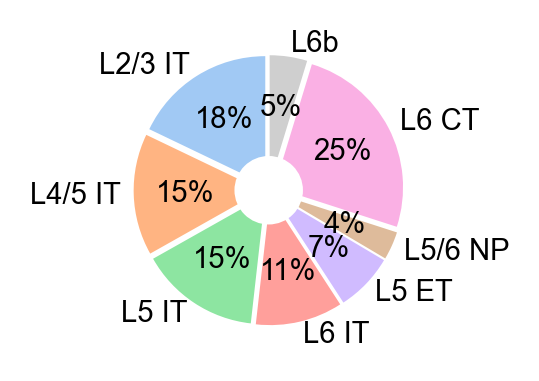

In [144]:
cell_to_plot = ['L2/3 IT','L4/5 IT','L5 IT',
                          'L6 IT','L5 ET','L5/6 NP','L6 CT','L6b']


cell_num = [cellgroup_num_dict[_type] for _type in cell_to_plot]

# Seaborn color palette to plot pie chart
colors = sns.color_palette('pastel')

explode_list = [0.05]*len(cell_to_plot)

fig, ax = plt.subplots(figsize=(_page_width/3.9,(_page_width/3.9)), dpi=_dpi/2)

# create pie chart using matplotlib
ax.pie(cell_num, labels=cell_to_plot, colors=colors,startangle=90, autopct='%1.0f%%',
        explode=explode_list,textprops={'fontsize': _font_size-0.5})

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.25, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.rcParams.update({'font.size': _font_size-0.5})


plt.savefig(os.path.join(output_figure_folder, f'MOp_Gluta_piechart_forDNA.pdf'), 
            transparent=True, dpi=_dpi, bbox_inches='tight')
plt.show()

##### Inhibitory neurons

meta NOT subset; don't know how to subset; dropped


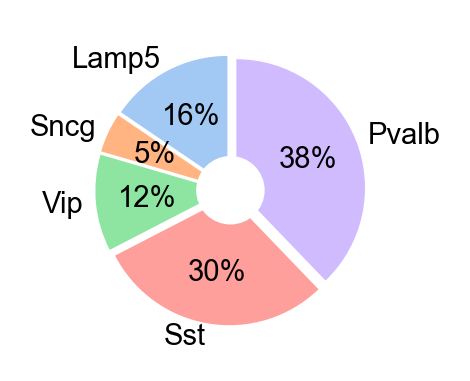

In [143]:
# 

cell_to_plot = ['Lamp5','Sncg','Vip','Sst','Pvalb']


cell_num = [cellgroup_num_dict[_type] for _type in cell_to_plot]

# Seaborn color palette to plot pie chart
colors = sns.color_palette('pastel')

explode_list = [0.05]*len(cell_to_plot)

fig, ax = plt.subplots(figsize=(_page_width/3.9,(_page_width/3.9)), dpi=_dpi/2)

# create pie chart using matplotlib
ax.pie(cell_num, labels=cell_to_plot, colors=colors,startangle=90, autopct='%1.0f%%',
        explode=explode_list,textprops={'fontsize': _font_size-0.5})

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.25, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.rcParams.update({'font.size': _font_size-0.5})


plt.savefig(os.path.join(output_figure_folder, f'MOp_GABA_piechart_forDNA.pdf'), 
            transparent=True, dpi=300, bbox_inches='tight')

plt.show()